In [3]:
!pip install matplotlib numpy astropy pandas sklearn

#*********************************************** Necessary Packages ***********************************************
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import fits
import glob
import pandas as pd


from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.utils import shuffle
import sklearn

In [4]:
DATA_PATH = "data/POC"

In [5]:
filenames = glob.glob(f'{DATA_PATH}/mvn_iuv_l1b_apoapse-orbit*.gz')
print(len(filenames))

12


In [6]:

l1b = fits.open(filenames[5])
data_l1b = l1b[5].data
data_l1b.shape

(158, 50, 20)

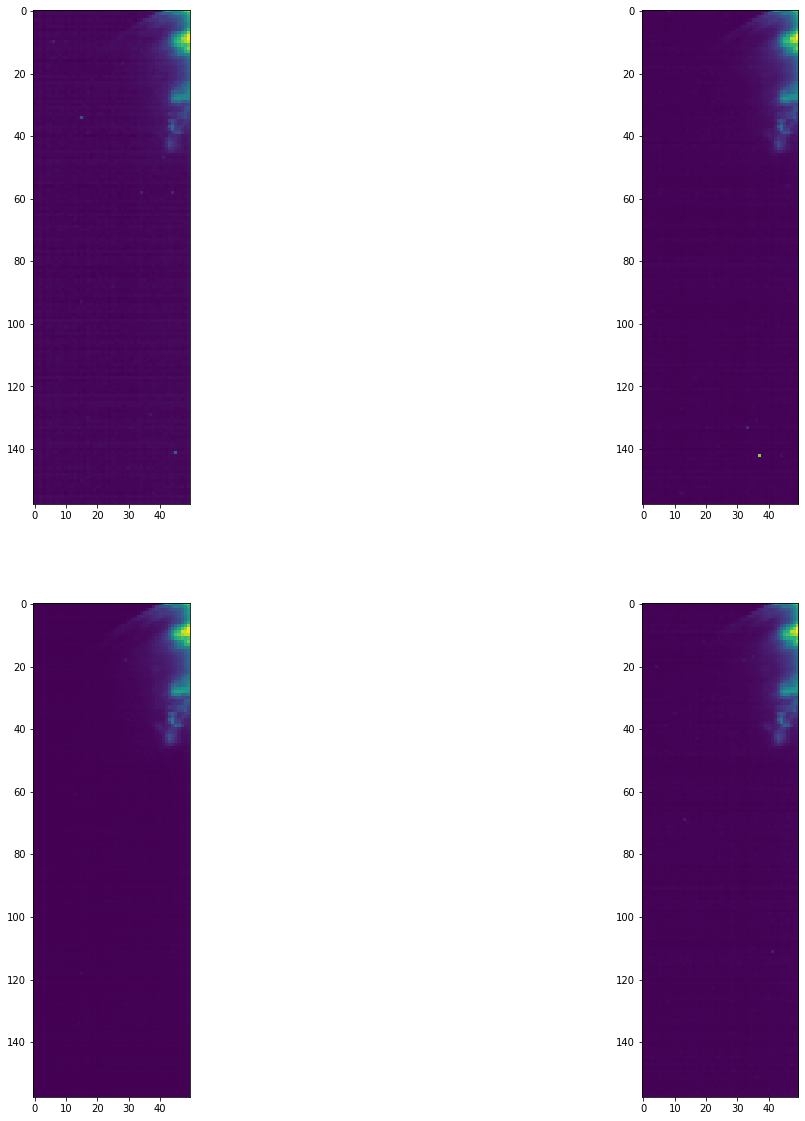

In [7]:
#Dividing the figure into parts?
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(data_l1b[:, :, 5], cmap = 'viridis')
plt.subplot(2,2,2)
plt.imshow(data_l1b[:, :, 10], cmap = 'viridis')
plt.subplot(2,2,3)
plt.imshow(data_l1b[:, :, 15], cmap = 'viridis')
plt.subplot(2,2,4)
plt.imshow(data_l1b[:, :, 18], cmap = 'viridis')

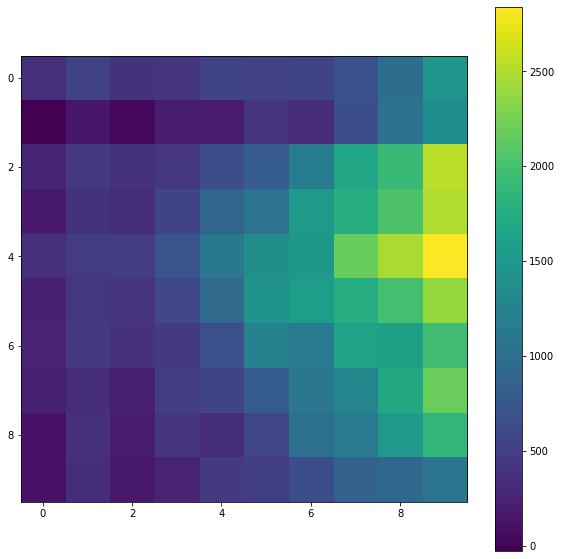

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[5:15, 40:, 0], cmap = 'viridis')
plt.colorbar()

In [9]:
px = [7, 8, 9, 10, 11, 12, 13, 14]
py = [49]*len(px)
block1 = data_l1b[7:14, 43:50, :]
block1.shape

(7, 7, 20)

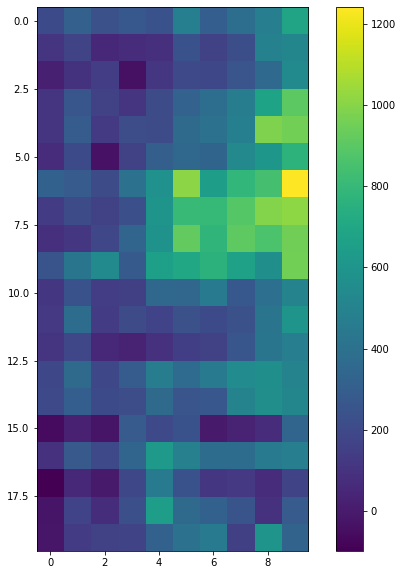

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[20:40, 40:, 0], cmap = 'viridis')
plt.colorbar()

In [11]:
block2 = data_l1b[26:29, 45:50, :]
block2.shape

(3, 5, 20)

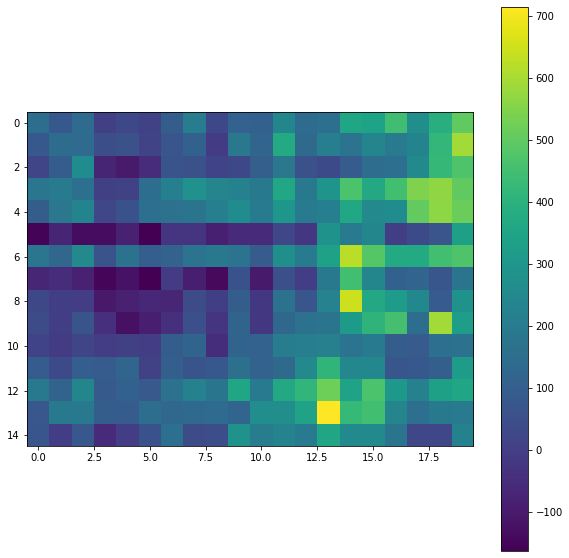

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[30:45, 30:, 0], cmap = 'viridis')
plt.colorbar()

In [13]:
px = [36, 37, 38, 42, 43, 41, 41, 42, 43, 42, 43]
py = [44, 44, 44, 43, 43, 43, 44, 44, 44, 45, 45]
block3 = data_l1b[px,py, :]
block3.shape

(11, 20)

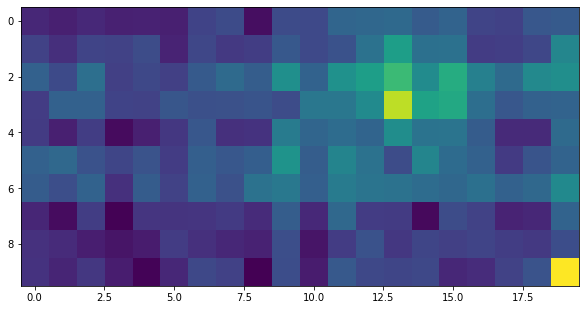

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[40:50, 30:, 0], cmap = 'viridis')


In [15]:
px4 = [44, 45, 46, 46]
py4 = [39, 39, 39, 38]
block4 = data_l1b[px4,py4, :]
block4.shape

(4, 20)

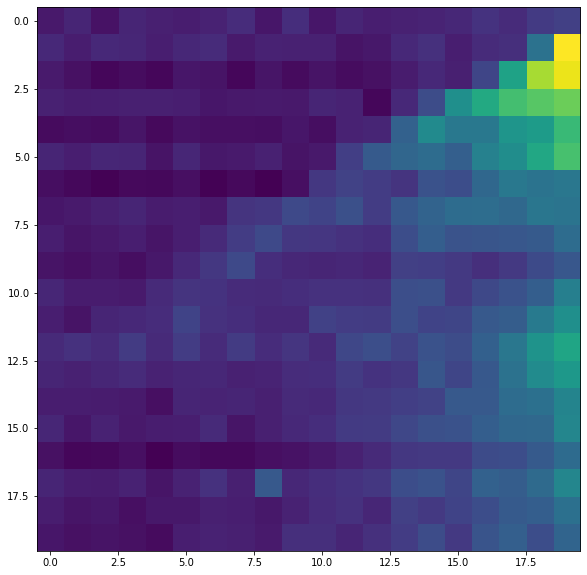

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[0:20, 20:40, 5], cmap = 'viridis')


In [17]:
px5 = [9, 8, 7, 7, 6, 5, 6, 7, 5, 5, 4, 4, 3, 3]
py5 = [27, 28, 29, 30, 30, 31, 31, 31, 32, 33, 33, 34, 35, 36]
block5 = data_l1b[px5,py5, :]
block5.shape

(14, 20)

In [18]:
block6 = data_l1b[10:16, 37:50, :]
block6.shape

(6, 13, 20)

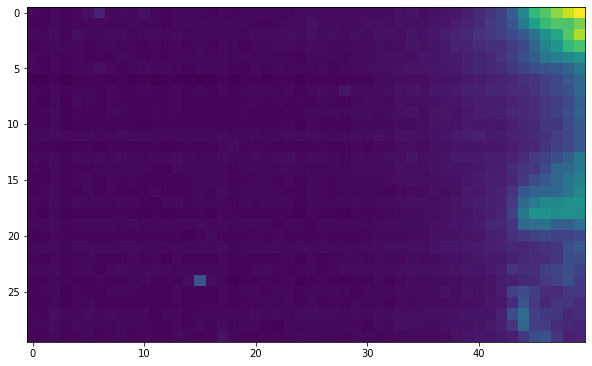

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[10:40, :, 5], cmap = 'viridis')


In [20]:
block7 = data_l1b[10:20, 30:50, :]
block7.shape

block8 = data_l1b[20:40, 35:50, :]
block8.shape

(20, 15, 20)

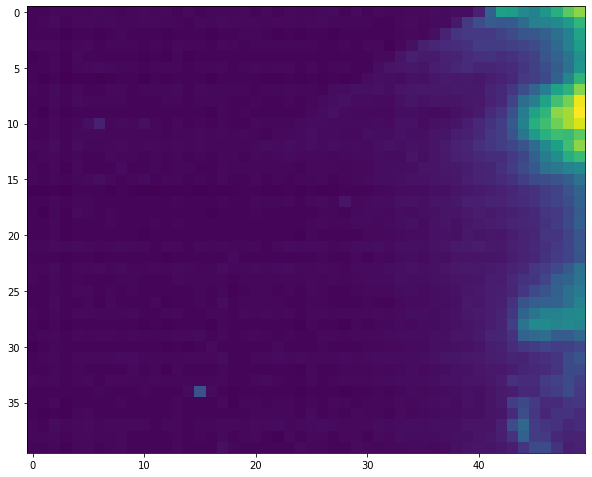

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[0:40, :, 5], cmap = 'viridis')

In [22]:
block9 = data_l1b[0:4, 40:, :]
block9.shape

(4, 10, 20)

In [23]:
def make_df(image_subset, rows):
    df = pd.DataFrame(
        image_subset.reshape(rows, 20),
        dtype=float,
        columns=[f"S_{str(x).zfill(2)}" for x in range(0,20)]
    ).reset_index(drop=True)
    df0 = df["S_00"]
    df = df[[x for x in df.columns if "S_00" not in x]].div(df0, axis=0)
    df["S_00"] = df0
    return df

In [25]:
clouds0 = make_df(block1, block1.shape[0]*block1.shape[1])
clouds1 = make_df(block2, block2.shape[0]*block2.shape[1])
clouds2 = make_df(block3, block3.shape[0])
clouds3 = make_df(block4, block4.shape[0])
clouds4 = make_df(block5, block5.shape[0])
clouds5 = make_df(block6, block6.shape[0]*block6.shape[1])
clouds6 = make_df(block7, block7.shape[0]*block7.shape[1])
clouds7 = make_df(block8, block8.shape[0]*block8.shape[1])
clouds8 = make_df(block9, block9.shape[0]*block9.shape[1])

clouds = pd.concat([clouds0, clouds1, clouds2, clouds3, clouds4,clouds5, clouds6, clouds7, clouds8])
clouds["target"] = 1
print(clouds.shape)
clouds.head()

(711, 21)


,S_01,S_02,S_03,S_04,S_05,S_06,S_07,S_08,S_09,S_10,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_00,target
0,1.831019,3.314815,5.138889,5.620370,5.851852,5.925926,8.217593,7.370370,10.013889,13.189815,...,24.314815,17.613426,18.981481,26.324074,26.377315,17.388889,13.067130,7.763889,432.0,1
1,2.083333,3.586420,5.913580,5.643519,6.216049,5.507716,7.538580,7.331790,9.930556,13.967593,...,24.228395,17.313272,19.804012,27.645062,27.160494,18.586420,14.466049,7.929012,648.0,1
2,2.718866,4.416769,6.531443,7.012330,7.067818,6.828607,8.987670,8.273736,12.061652,15.932182,...,27.651048,20.715166,22.083847,31.183724,31.805179,21.406905,15.818742,9.922318,811.0,1
3,2.283898,4.042373,6.030508,6.550847,6.480508,6.111864,7.947458,7.372034,11.031356,14.133051,...,25.601695,18.394915,20.447458,27.991525,27.202542,19.798305,14.927966,8.993220,1180.0,1
4,2.544961,3.855160,5.710923,6.003621,6.319855,5.971635,7.639710,7.031382,10.069403,14.055522,...,24.041038,17.523838,19.143030,26.004828,25.814725,18.296922,13.835244,8.319855,1657.0,1


In [28]:
tougher = fits.open(filenames[3])
tdata = tougher[5].data
tsza = tougher[16].data["PIXEL_SOLAR_ZENITH_ANGLE"]
term_mask = np.where(tsza < 90)

tough_term = tdata.copy()
tough_term[term_mask] = 0

In [29]:
ice_block = tdata[100:160, 0:20, :]
ice_df = make_df(ice_block, ice_block.shape[0]*ice_block.shape[1])

In [31]:
null2 = tdata[80:100, 0:20, :]
null2_df = make_df(null2, null2.shape[0]*null2.shape[1])

In [32]:
null_block_0 = data_l1b[120:140, 0:20, :]
null0 = make_df(null_block_0, null_block_0.shape[0] * null_block_0.shape[1])
null = pd.concat([null0, ice_df, null2_df])
null["target"] = 0
null = shuffle(null)
print(null.shape)
null.head()

(2000, 21)


,S_01,S_02,S_03,S_04,S_05,S_06,S_07,S_08,S_09,S_10,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_00,target
829,2.864407,1.584746,2.991525,3.449153,2.627119,2.593220,2.745763,4.000000,4.059322,4.864407,...,9.584746,9.016949,9.271186,12.669492,15.576271,8.025424,6.347458,3.838983,118.0,0
111,2.055556,0.555556,3.944444,2.138889,-0.638889,-2.222222,29.777778,-2.694444,-0.944444,2.611111,...,-0.194444,-2.527778,1.916667,3.000000,-3.972222,-1.666667,1.972222,0.694444,-36.0,0
87,2.957895,5.257895,5.363158,5.384211,5.684211,4.894737,7.173684,5.615789,9.252632,9.426316,...,22.468421,15.600000,15.973684,23.215789,23.268421,13.626316,9.415789,5.678947,190.0,0
542,-0.119565,0.815217,2.315217,3.902174,2.630435,1.782609,2.478261,3.228261,1.250000,0.934783,...,8.771739,5.478261,5.967391,4.086957,6.586957,5.695652,3.869565,4.358696,92.0,0
311,10.333333,-9.666667,13.000000,-17.166667,20.500000,38.666667,194.166667,26.500000,-4.333333,35.000000,...,-1.166667,13.166667,61.833333,5.000000,-28.166667,9.333333,27.166667,13.833333,-6.0,0


In [33]:
full = pd.concat([clouds, null])
full = shuffle(full)
print(full.shape)
full.head()

(2711, 21)


,S_01,S_02,S_03,S_04,S_05,S_06,S_07,S_08,S_09,S_10,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_00,target
363,1.663102,2.470588,2.727273,2.101604,1.577540,2.588235,2.411765,2.080214,3.090909,4.032086,...,8.941176,6.331551,5.673797,8.256684,10.245989,4.620321,3.368984,2.363636,187.0,0
1090,0.405405,2.824324,0.500000,1.135135,0.662162,0.108108,1.675676,3.013514,3.797297,1.608108,...,15.310811,1.351351,1.986486,2.824324,5.202703,-1.486486,1.689189,0.986486,74.0,0
473,46.533333,70.966667,100.633333,77.733333,87.000000,62.333333,91.000000,76.400000,111.866667,147.333333,...,285.800000,212.000000,223.100000,301.166667,293.066667,179.633333,133.566667,77.233333,30.0,0
8,0.566474,0.606936,0.601156,0.531792,0.682081,1.138728,0.913295,1.190751,1.271676,1.121387,...,0.416185,0.890173,1.797688,1.820809,0.595376,1.988439,1.196532,1.930636,-173.0,0
35,3.030658,4.872858,7.071235,7.760144,7.679892,7.605050,9.449053,8.833183,12.469793,17.010821,...,29.776375,22.058611,24.039675,33.188458,32.659152,23.338142,16.742110,10.393147,1109.0,1


In [34]:
x, y = full.drop(columns=["target"]), full["target"]
x.fillna(0, inplace=True)
x.replace([np.inf, -np.inf], 0, inplace=True)

#x = sklearn.preprocessing.normalize(x, norm='l2', axis=1, copy=True, return_norm=False)
scaler = sklearn.preprocessing.MinMaxScaler()

x = scaler.fit_transform(x)
#lr = LR()
lr = RFC()
lr.fit(x, y)
lr.score(x, y)

0.9992622648469199

In [35]:
all_rows = data_l1b.reshape(data_l1b.shape[0]*data_l1b.shape[1], 20)
all_rows = pd.DataFrame(all_rows, dtype=float, columns=[f"S_{str(x).zfill(2)}" for x in range(0,20)]).reset_index(drop=True)
as0 = all_rows["S_00"]
all_rows = all_rows[[x for x in all_rows.columns if "S_00" not in x]].div(as0, axis=0)
all_rows["S_00"] = as0

all_rows.fillna(0, inplace=True)
all_rows.replace([np.inf, -np.inf], 0, inplace=True)


#all_rows = sklearn.preprocessing.normalize(all_rows, norm='l2', axis=1, copy=True, return_norm=False)
all_rows = scaler.transform(all_rows)

binarize = lr.predict(all_rows).reshape(data_l1b.shape[0:2])
#binarize[term_mask] = 0

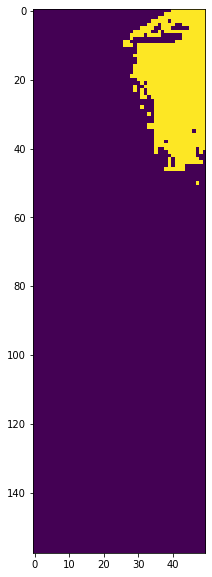

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(binarize, cmap = 'viridis')

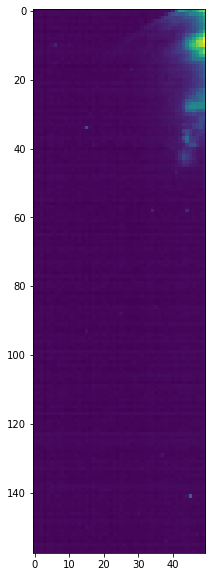

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(data_l1b[:, :, 5], cmap = 'viridis')

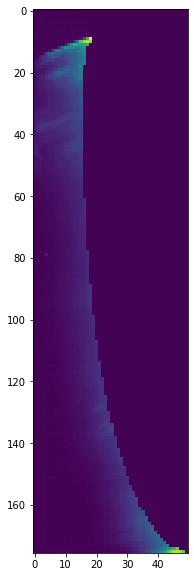

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(tough_term[:, :, 5], cmap = 'viridis')

In [39]:
all_rows = tdata.reshape(tdata.shape[0]*tdata.shape[1], 20)
all_rows = pd.DataFrame(all_rows, dtype=float, columns=[f"S_{str(x).zfill(2)}" for x in range(0,20)]).reset_index(drop=True)
as0 = all_rows["S_00"]
all_rows = all_rows[[x for x in all_rows.columns if "S_00" not in x]].div(as0, axis=0)
all_rows["S_00"] = as0

all_rows.fillna(0, inplace=True)
all_rows.replace([np.inf, -np.inf], 0, inplace=True)


#all_rows = sklearn.preprocessing.normalize(all_rows, norm='l2', axis=1, copy=True, return_norm=False)
all_rows = scaler.transform(all_rows)

binarize = lr.predict(all_rows).reshape(tdata.shape[0:2])
binarize[term_mask] = -1
print(binarize.sum())
binarize

-4819


array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       ...,
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ...,  0,  0, -1]])

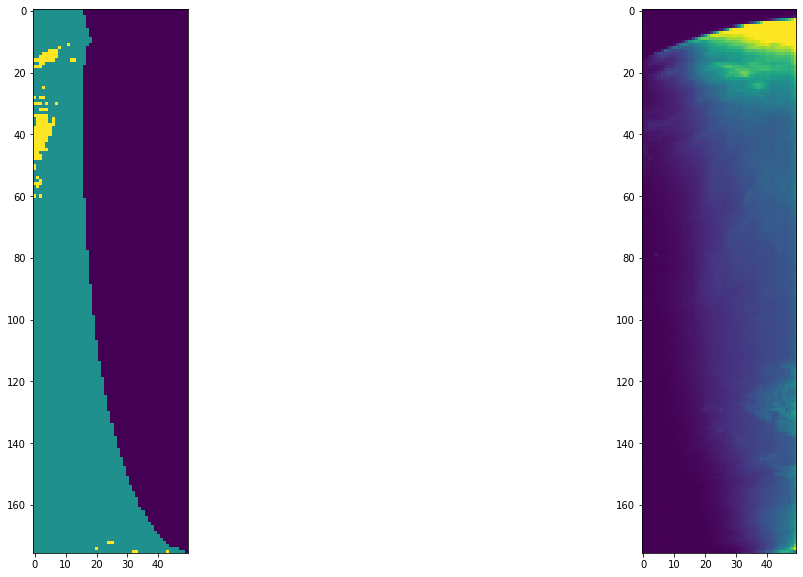

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(binarize, cmap = 'viridis')
ax[1].imshow(tdata[:, :, 5], cmap="viridis", vmax=100000)

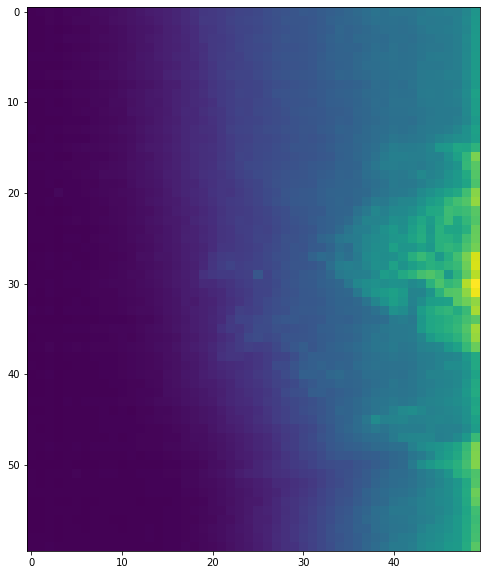

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(tdata[100:160, :, 5], cmap = 'viridis')

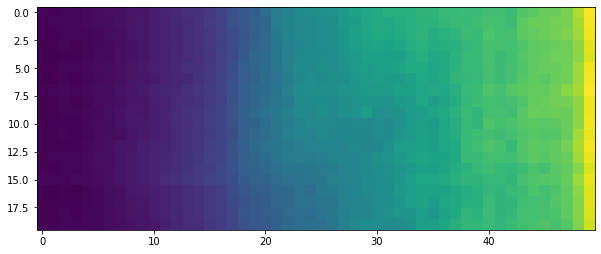

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(tdata[80:100, :, 5], cmap = 'viridis')

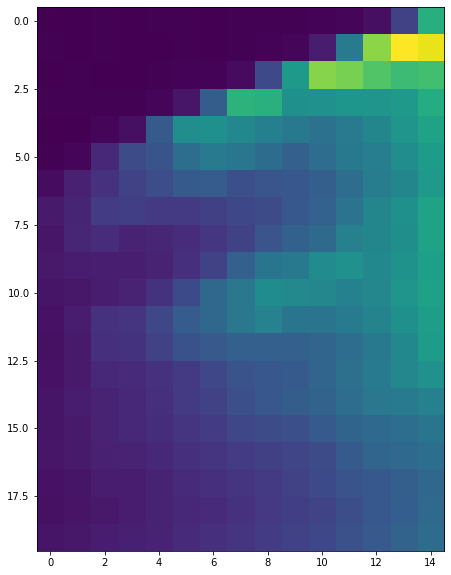

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(tdata[10:30, 0:15, 5], cmap = 'viridis')